In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

from itertools import cycle
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.model_selection import cross_val_score

/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
TRAINING_IMAGES = '/home/smannan/finalproject/data/training_hog_100x100.npy'
TRAINING_LABELS = '/home/smannan/finalproject/data/training_labels_100x100.npy'
SAVE_MODEL = '/home/smannan/finalproject/models/random_forest_best_estimator.p'
IMAGE_SIZE = 100


param_grid = {
    'n_estimators' : np.array(np.linspace(10, 110, 10), dtype=np.int64)
}

In [3]:
def five_fold_roc(X, y, model, outfile, n_splits=5):
    cv = StratifiedKFold(n_splits=n_splits)
    
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    logloss = [] 
    accuracy = []

    colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
    lw = 2

    i = 0
    for (train, test), color in zip(cv.split(X, y), colors):
        model.fit(X[train], y[train])
        ypred = model.predict(X[test])
        logloss.append(metrics.log_loss(y[test], model.predict_log_proba(X[test])))
        accuracy.append(metrics.accuracy_score(y[test], ypred))
        fpr, tpr, thresholds = roc_curve(y[test], ypred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=lw, color=color,
                 label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

        i += 1
        
    plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')
    
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    
    plt.savefig(outfile)
    plt.show()
    
    f = open('/home/smannan/finalproject/random_forest_logloss.p', 'wb')
    pickle.dump(logloss, f)
    f.close()
    
    f = open('/home/smannan/finalproject/random_forest_acc.p', 'wb')
    pickle.dump(accuracy, f)
    f.close();

In [4]:
def load_data(train=TRAINING_IMAGES, label=TRAINING_LABELS):
    x_train = np.load(open(TRAINING_IMAGES,'rb'))
    y_train = np.load(open(TRAINING_LABELS,'rb'))
    
    return (x_train, y_train)

In [5]:
def grid_search(model, param_grid, X, y, folds=5):
    grid = GridSearchCV(model, param_grid, cv=folds)
    grid.fit(X, y)
    f = open(SAVE_MODEL, 'wb')
    pickle.dump(grid.best_estimator_, f)
    f.close()
    return (grid)

In [6]:
X_hog, y_hog = load_data()

In [7]:
assert len(X_hog.shape) == 2
assert X_hog.shape[0] == 25000
assert y_hog.shape[0] == 25000

In [10]:
# grid = grid_search(RandomForestClassifier(n_jobs=-1, verbose=True), param_grid, X, y, folds=3)

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   34.7s finished
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=24)]: Done 110 out of 110 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   35.1s finished
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   33.7s finished
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.1s
[Parall

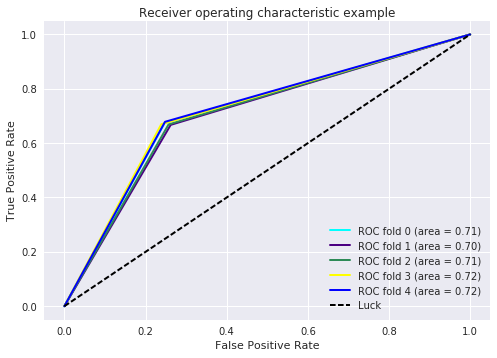

In [12]:
model = pickle.load(open(SAVE_MODEL, 'rb'))
five_fold_roc(X_hog, y_hog, model,'/home/smannan/finalproject/output/hog_features.png')

In [13]:
logloss = pickle.load(open('/home/smannan/finalproject/random_forest_logloss.p', 'rb'))
acc = pickle.load(open('/home/smannan/finalproject/random_forest_acc.p', 'rb'))
print (np.mean(logloss), np.mean(acc))

0.69314718056 0.71052


In [6]:
X_pca, y_pca = load_data(train='/home/smannan/finalproject/data/training_pca_100x100.npy')

In [7]:
assert len(X_pca.shape) == 2
assert X_pca.shape[0] == 25000
assert y_pca.shape[0] == 25000

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   27.0s finished
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   26.4s finished
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   27.9s finished
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parall

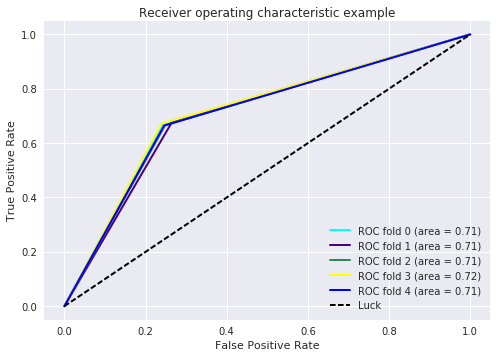

In [8]:
model = pickle.load(open(SAVE_MODEL, 'rb'))
five_fold_roc(X_pca, y_pca, model,'/home/smannan/finalproject/output/pca_features.png')